<a href="https://colab.research.google.com/github/Z0rr09/OD-WeaponDetection/blob/master/Module_6_Deep_Learning_Pistol_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep-Learning Project (Transfer Learning)
Reference: https://kikaben.com/yolov5-transfer-learning-dogs-cats/

Reference: https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#13-prepare-dataset-for-yolov5

In [ ]:
#-----------------------------This Task to clone directory have been done-----------------------------------------
#Clone GitHub repository to Google Collab env.
repo_link = 'https://github.com/ari-dasci/OD-WeaponDetection.git'
repo = git.Repo.clone_from(repo_link,'/content/Weapon_Repository')

In [ ]:
#Move files to google drive
sourceFolder = '/content/Weapon_Repository/Weapons and similar handled objects/Sohas_weapon-Detection-YOLOv5'
targerFolder = '/content/drive/MyDrive/DeepLData'

if os.path.exists(sourceFolder) == True:
  shutil.copytree(sourceFolder, targerFolder)

In [ ]:
#Task to do in every starting of a session.

colab = True # set to True is using google colab
#Install Git library
!pip install gitpython
#Clone yolov5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -U -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
#Load Relevant Libraries
import os
import random
import shutil
#import git
import pdb #Python debbuger - very useful tool
from google.colab import drive
import torch
from PIL import Image, ImageDraw
from IPython.display import display, Image as IMG
import matplotlib.image as mpimg
import yaml
import pdb
import numpy as np
import matplotlib.pyplot as plt
%load_ext tensorboard

## Module 6 - Deep Learning Project - Pistol Detection System

#Function to Review the Images Data - Image and Labels (annotation)

In [ ]:
#Get a few Example of database
def show_bbox(image_path):
  # convert image path to label path
  label_path = image_path.replace('/images/', '/labels/')
  label_path = label_path.replace('.jpg', '.txt')
  # Open the image and create ImageDraw object for drawing
  image = Image.open(image_path)
  draw = ImageDraw.Draw(image)
  print(image)
  with open(label_path, 'r') as f:
    for line in f.readlines():
      # Split the line into five values
      label, x, y, w, h = line.split(' ')

      # Convert string into float
      x = float(x)
      y = float(y)
      w = float(w)
      h = float(h)

      # Convert center position, width, height into
      # top-left and bottom-right coordinates
      W, H = image.size
      x1 = (x - w/2) * W
      y1 = (y - h/2) * H
      x2 = (x + w/2) * W
      y2 = (y + h/2) * H

      # Draw the bounding box with red lines
      draw.rectangle((x1, y1, x2, y2),outline=(255, 0, 0), width=5)# Line width
  return image

True


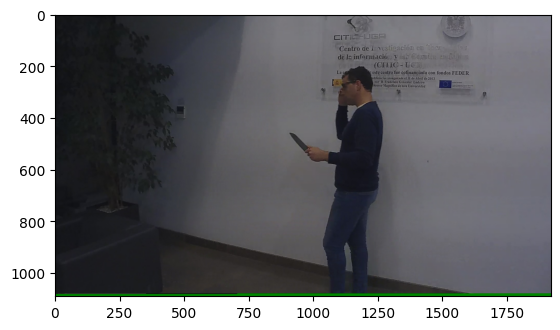

In [ ]:

%matplotlib inline
#/content/Weapon_Repository/Weapons and similar handled objects/Sohas_weapon-Detection-YOLOv5/obj_train_data/images/train/ABbframe00154.jpg
# Annotation - [Class,  2 0.49713541666666666 0.46788990825688076 0.0578125 0.10642201834862386
image_path = "/content/drive/MyDrive/DeepLData/obj_train_data/images/train/ABbframe00154.jpg"

#Sometimes there were will be issues with the file path - could be a lag in the cloning of the repository - restarting the sessions might help!
print(os.path.isfile(image_path))
image = plt.imread(image_path)
plt.imshow(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1090 at 0x79E2707A1DE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1506x1052 at 0x79E1C6353AC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x79E1C81EE020>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x718 at 0x79E1C63841F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x341 at 0x79E1C6384190>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x79E1C63848B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x79E1C6384C10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=410x612 at 0x79E1C63848B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x79E1C6384190>


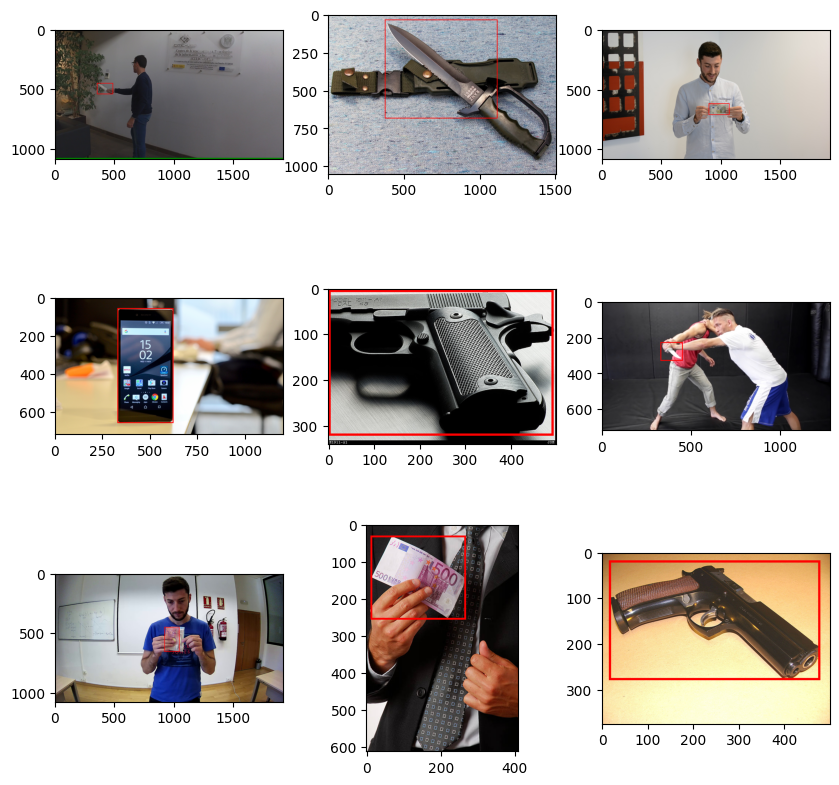

In [ ]:
################################# Get a few examples of Photos to present ####################################
base_Directory = "/content/drive/MyDrive/DeepLData/obj_train_data/images/train/"
all_files = os.listdir(base_Directory)
image_Paths = []

#Get 9 images randomly to see some images (train)
for i in range(9):
  img = random.choice(all_files)
  img_Path = base_Directory + img
  image_Paths.append(img_Path)

#Create Subplots axes to present data
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

#Images to train the data
for i, (ax, image_path) in enumerate(zip(axes, image_Paths)):
  img = show_bbox(image_path)
  ax.imshow(img)

In [ ]:
#Prepare the cofig file of the yolo5 model
import yaml

# Define the configuration parameters
config = {
    'path' : '/content/drive/MyDrive/DeepLData/obj_train_data/images/',
    'train': '/content/drive/MyDrive/DeepLData/obj_train_data/images/train',
    'val': '/content/drive/MyDrive/DeepLData/obj_train_data/images/test',
    'names' : {
    0: 'pistol',
    1: 'smartphone',
    2: 'knife',
    3: 'monedero',
    4: 'billete',
    5: 'tarjeta'
  }
}


# Write the configuration to a YAML file
output_path = '/content/dataset.yaml'

with open(output_path, 'w') as file:
    yaml.dump(config, file)


print(f'YAML configuration written to {output_path}')

YAML configuration written to /content/dataset.yaml


In [ ]:
#Increase number of Epochs and retrained the model
!python train.py --img 640 --epochs 50 --data /content/dataset.yaml --weights yolov5s.pt

2024-03-17 20:38:16.952302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 20:38:16.952348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 20:38:16.954330: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=

In [ ]:
#Copy Results files to google drive
resource = 'exp'
restarget = 'Epocs50'
sourceFolder = '/content/yolov5/runs/train/' + resource
targerFolder = '/content/drive/MyDrive/DeepLData/Results/' + restarget

if os.path.exists(sourceFolder) == True:
  shutil.copytree(sourceFolder, targerFolder)

In [ ]:
# Run the utils/plots.py script
%run 'utils/plots.py'
from utils.plots import plot_results
plot_results('/content/yolov5/runs/train/exp/results.csv')